In [2]:
import pickle
import pandas as pd
import numpy as np
from sklearn.cross_validation  import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pylab as plt
from sklearn import metrics
from sklearn import svm
import os

/Users/vikasshah/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
Yearfile = pd.read_csv('Quarter.csv',sep=',')
#Yearfile

In [4]:
to = input("Enter the To Quarter and year:")
frm = str(input("Enter the From Quarter and year:"))
print(to)
print(frm)

Enter the To Quarter and year:Q12005
Enter the From Quarter and year:Q12006
Q12005
Q12006


In [5]:
print(to)
tonumber = Yearfile[Yearfile['Values'] == to]
print (tonumber.Number.values)
fromnumber = Yearfile[Yearfile['Values'] == frm]
print (fromnumber.Number.values)


Q12005
[25]
[29]


In [6]:
ListOfYear= []
for i in range(tonumber.Number.values-1,fromnumber.Number.values):
    print(i)
    ListOfYear.append(Yearfile['Values'].iloc[i])
print(ListOfYear)

24
25
26
27
28
['Q12005', 'Q22005', 'Q32005', 'Q42005', 'Q12006']


/Users/vikasshah/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  from ipykernel import kernelapp as app


In [7]:
per_files = [file for file in os.listdir() if file.startswith('Historical_Performance_Validated_ata1_time_')]
per_files= per_files[:2]
per_files

['Sample_Performance_Validated_ata1_time_Q12005.csv',
 'Sample_Performance_Validated_ata1_time_Q22005.csv']

In [8]:
l1 = []
for file in per_files:
    if file[-10:-4] in ListOfYear:
        l1.append(file)

In [9]:
QuarterData1 = pd.read_csv(l1[0],index_col=None)

/Users/vikasshah/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
len(QuarterData2)

28997352

In [10]:
QuarterData2 = pd.read_csv(l1[1],index_col=None)

/Users/vikasshah/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
QD = QuarterData1.head(2500000)
QD1 = QuarterData2.head(2500000)

In [51]:
QD = QD.convert_objects(convert_numeric=True)

/Users/vikasshah/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [52]:
QD1 = QD1.convert_objects(convert_numeric=True)

/Users/vikasshah/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [53]:
QD['CURRENT_LOAN_DELINQUENCY_STATUS'].replace('nan',999,inplace=True)
QD1['CURRENT_LOAN_DELINQUENCY_STATUS'].replace('nan',999,inplace=True)

QD['Deliquent'] = np.where(QD['CURRENT_LOAN_DELINQUENCY_STATUS'].astype(int) > 0 , 1 , 0)
QD1['Deliquent'] = np.where(QD1['CURRENT_LOAN_DELINQUENCY_STATUS'].astype(int) > 0 , 1 , 0)

QD['Deliquent'].unique()
QD1['Deliquent'].unique()


### first dataframe
QD['MODIFICATION_FLAG'] = QD['MODIFICATION_FLAG'].replace('Y',1)
QD['MODIFICATION_FLAG'] = QD['MODIFICATION_FLAG'].replace('U',2)
QD['MODIFICATION_FLAG'] = QD['MODIFICATION_FLAG'].replace('N',0)

QD['REPURCHASE_FLAG'] = QD['REPURCHASE_FLAG'].replace('U',2)
QD['REPURCHASE_FLAG'] = QD['REPURCHASE_FLAG'].replace('N',0)
QD['REPURCHASE_FLAG'] = QD['REPURCHASE_FLAG'].replace('Y',1)

QD['Unknown'].fillna(0,inplace=True)
QD['NET_SALES_PROCEEDS'].fillna(0,inplace=True)
QD['NON_MI_RECOVERIES'].fillna(0,inplace=True)


#### Second dataframe

QD1['MODIFICATION_FLAG'] = QD1['MODIFICATION_FLAG'].replace('Y',1)
QD1['MODIFICATION_FLAG'] = QD1['MODIFICATION_FLAG'].replace('U',2)
QD1['MODIFICATION_FLAG'] = QD1['MODIFICATION_FLAG'].replace('N',0)

QD1['REPURCHASE_FLAG'] = QD1['REPURCHASE_FLAG'].replace('U',2)
QD1['REPURCHASE_FLAG'] = QD1['REPURCHASE_FLAG'].replace('N',0)
QD1['REPURCHASE_FLAG'] = QD1['REPURCHASE_FLAG'].replace('Y',1)

QD1['EXPENSES'].fillna(0,inplace=True)
QD1['Unknown'].fillna(0,inplace=True)
QD1['NET_SALES_PROCEEDS'].fillna(0,inplace=True)
QD1['NON_MI_RECOVERIES'].fillna(0,inplace=True)

In [54]:
QD.head()

,LOAN_SEQUENCE_NUMBER,MONTHLY_REPORTING_PERIOD,CURRENT_ACTUAL_UPB,CURRENT_LOAN_DELINQUENCY_STATUS,LOAN_AGE,REMAINING_MONTHS_TO_LEGAL_MATURITY,REPURCHASE_FLAG,MODIFICATION_FLAG,ZERO_BALANCE_CODE,ZERO_BALANCE_EFFECTIVE_DATE,...,NON_MI_RECOVERIES,EXPENSES,Legal_Costs,Maintenance_and_Preservation_Costs,Taxes_and_Insurance,Miscellaneous_Expenses,Actual_Loss_Calculation,Modification_Cost,Unknown,Deliquent
0,F105Q1000001,200504,190000.0,0.0,0,360,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,F105Q1000001,200505,190000.0,0.0,1,359,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,F105Q1000001,200506,190000.0,0.0,2,358,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,F105Q1000001,200507,189000.0,0.0,3,357,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,F105Q1000001,200508,189000.0,0.0,4,356,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [55]:
QD1.head()

,LOAN_SEQUENCE_NUMBER,MONTHLY_REPORTING_PERIOD,CURRENT_ACTUAL_UPB,CURRENT_LOAN_DELINQUENCY_STATUS,LOAN_AGE,REMAINING_MONTHS_TO_LEGAL_MATURITY,REPURCHASE_FLAG,MODIFICATION_FLAG,ZERO_BALANCE_CODE,ZERO_BALANCE_EFFECTIVE_DATE,...,NON_MI_RECOVERIES,EXPENSES,Legal_Costs,Maintenance_and_Preservation_Costs,Taxes_and_Insurance,Miscellaneous_Expenses,Actual_Loss_Calculation,Modification_Cost,Unknown,Deliquent
0,F105Q2000001,200507,214000.0,0.0,0,360,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,F105Q2000001,200508,214000.0,0.0,1,359,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,F105Q2000001,200509,214000.0,0.0,2,358,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,F105Q2000001,200510,213000.0,0.0,3,357,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,F105Q2000001,200511,213000.0,0.0,4,356,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [56]:
train_y =QD['Deliquent']
train_colsToKeep = ['LOAN_AGE','ZERO_BALANCE_CODE','REPURCHASE_FLAG','MODIFICATION_FLAG','CURRENT_INTEREST_RATE',
             'CURRENT_DEFERRED_UPB','REMAINING_MONTHS_TO_LEGAL_MATURITY','NET_SALES_PROCEEDS','NON_MI_RECOVERIES','Actual_Loss_Calculation']

train_X = QD[train_colsToKeep]

train_y = np.ravel(train_y)


In [57]:
test_y =QD1['Deliquent']
test_colsToKeep = ['LOAN_AGE','ZERO_BALANCE_CODE','REPURCHASE_FLAG','MODIFICATION_FLAG','CURRENT_INTEREST_RATE',
             'CURRENT_DEFERRED_UPB','REMAINING_MONTHS_TO_LEGAL_MATURITY','NET_SALES_PROCEEDS','NON_MI_RECOVERIES','Actual_Loss_Calculation']

test_X = QD1[test_colsToKeep]

test_y = np.ravel(test_y)

In [58]:
### train data , first for first dataframe
Xtrain= train_X
y_train = train_y

In [59]:
### test data, second for first dataframe
X_test = test_X
y_test = test_y

In [60]:
clf = RandomForestClassifier(n_estimators=20,verbose =1,min_samples_split=2)
clf = clf.fit(Xtrain, y_train)

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.9min finished


In [61]:
scores = cross_val_score(clf, X_test, y_test)

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   56.8s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   59.5s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   59.1s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.6s finished


In [62]:
scores.mean() 

0.95350559993838502

In [63]:
pred = clf.predict(X_test)

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    9.6s finished


In [64]:
metrics.accuracy_score(y_test,pred)

0.95320159999999998

In [70]:
pd.crosstab(pred, y_test,rownames=['pred'],colnames=['ytest'])

ytest,0,1
pred,,
0,2375995,108381
1,8615,7009


In [ ]:
print("Saving the model")

In [ ]:
# save the model to disk
filename = 'RandomForest_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [74]:
preds = clf.predict_proba(X_test)[:,1]
fpr,tpr, _ = roc_curve(y_test,preds)

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   11.1s finished


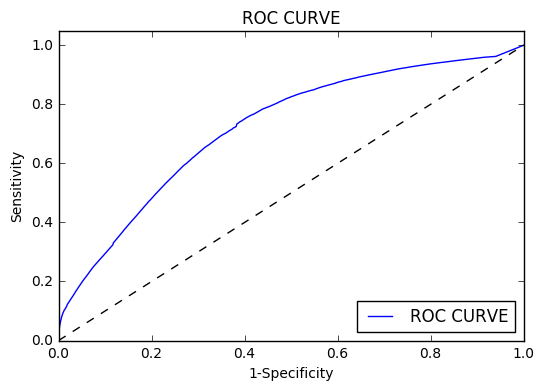

In [76]:
plt.figure()
plt.plot(fpr,tpr,label= "ROC CURVE")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [73]:
print("The End..!")